In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('cluster_example_data.csv')
data = data.values

In [3]:
np.random.shuffle(data)

In [4]:
X = data[:,:-1]
ids = data[:,-1]

In [5]:
X

array([[44, 12],
       [52, 22],
       [48,  4],
       [44,  2],
       [48, 18],
       [40,  3],
       [34, 15],
       [38, 20],
       [30,  2],
       [52,  4],
       [34, 22],
       [52, 10],
       [34,  5],
       [24, 10],
       [25,  5],
       [60, 19],
       [25,  3],
       [60,  2],
       [48,  5],
       [52,  4],
       [30,  3],
       [52,  2],
       [25, 18],
       [44,  8],
       [34, 18],
       [25, 15]])

In [6]:
import matplotlib.pyplot as plt

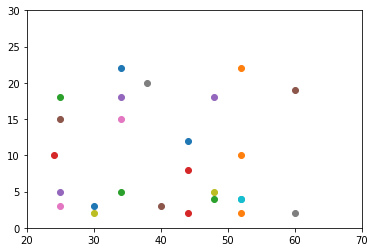

In [7]:
for V in X:
    plt.scatter(V[0],V[1])
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
hc = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=4)

In [35]:
cluster_idf = hc.fit(X)

In [36]:
cluster_idf.labels_

array([3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 2])

In [37]:
cluster_nums = []
for data_num, cluster_num in enumerate(cluster_idf.labels_): 
    cluster_nums.append(cluster_num)
    print(ids[data_num], cluster_num)

4 3
6 1
16 0
15 0
5 1
14 0
21 1
3 1
2 0
17 0
9 2
25 0
0 0
12 1
1 0
7 3
19 0
18 0
22 0
20 0
13 0
24 0
10 2
23 0
8 1
11 2


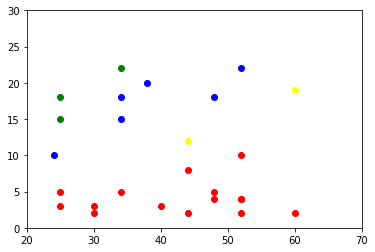

In [38]:
import matplotlib.pyplot as plt
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [39]:
# cluster_idf1 = AgglomerativeClustering(linkage='single' , affinity='cosine', n_clusters=4).fit(X)
# cluster_idf1 = AgglomerativeClustering(linkage='single' , affinity='euclidean', n_clusters=4).fit(X)
cluster_idf1 = AgglomerativeClustering(linkage='average' , affinity='euclidean', n_clusters=4).fit(X)

In [40]:
cluster_idf1.labels_

array([0, 2, 0, 0, 2, 0, 1, 1, 3, 0, 1, 0, 3, 3, 3, 2, 3, 0, 0, 0, 3, 0,
       1, 0, 1, 1])

4 0
6 2
16 0
15 0
5 2
14 0
21 1
3 1
2 3
17 0
9 1
25 0
0 3
12 3
1 3
7 2
19 3
18 0
22 0
20 0
13 3
24 0
10 1
23 0
8 1
11 1


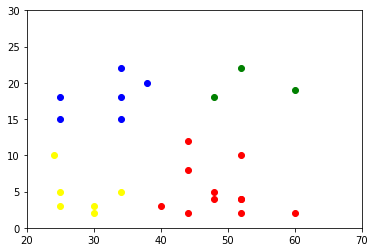

In [41]:
cluster_nums = []
for data_num, cluster_num in enumerate(cluster_idf1.labels_): 
    cluster_nums.append(cluster_num)
    print(ids[data_num], cluster_num)
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

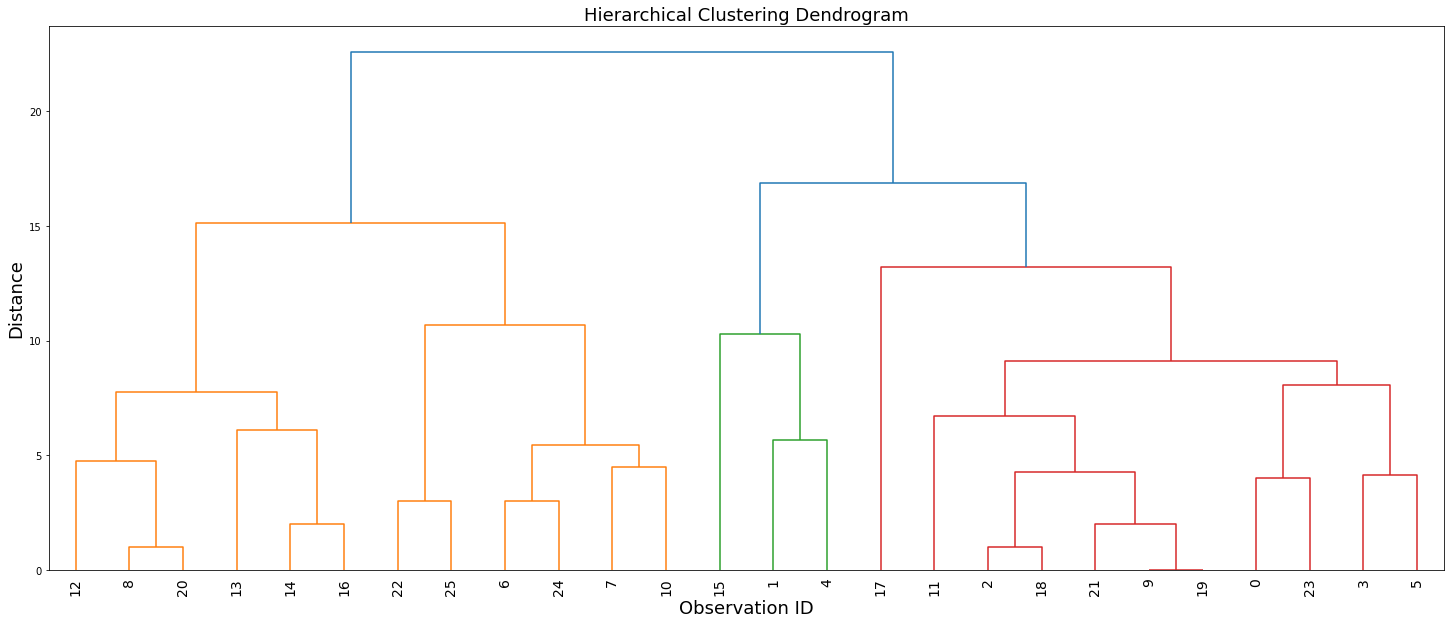

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
# Z = linkage(X, 'ward')
# Z = linkage(X, 'single')
Z = linkage(X, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Observation ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()